In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [172]:
def min_max_vs(dct, corr={}):
    vals = np.array([dct[key] - corr.get(key, 0.) for key in dct.keys()])
    return np.min(vals, axis=0), np.max(vals, axis=0)

In [178]:
cat = '4FGL'
folder = '../ML_3FGL_paper/SOM'
cat_fn = '%s/%s_prob_catalog.csv' % (folder, cat)
cat_df = pd.read_csv(cat_fn, index_col=0)
labels = ['AGN', 'PSR', 'MIXED']
plots_folder = 'plots/Accuracies'
print(cat_df.columns)

Index(['GLAT', 'Ln_Flux1000', 'PL_Index', 'Unc_LP_Index', 'LP_beta',
       'LP_SigCurv', 'HR12', 'HR23', 'Unc_PLEC_Expfactor', 'HR34', 'HR45',
       'HR56', 'HR67', 'Ln_Variability_Index', 'Ln_Pivot_Energy',
       'Category_4FGL', 'CLASS_4FGL', 'SpectrumType', 'ASSOC_FGL', 'ASSOC1',
       'AGN_BDT', 'PSR_BDT', 'AGN_NN', 'PSR_NN', 'AGN_LR', 'PSR_LR', 'AGN_RF',
       'PSR_RF', 'Times_in_Testing', 'Flags', 'Category_Prob', 'GLON'],
      dtype='object')


In [179]:
sin_glat = np.abs(np.sin(np.deg2rad(cat_df['GLAT'])))

In [180]:
nbins = 10
sin_bins = np.linspace(0, 1, nbins + 1)**1.5
sin_bins_c = (sin_bins[1:] + sin_bins[:-1]) / 2

In [181]:
masks = {}
masks['AGN & PSR'] = (cat_df['Category_%s' % cat] == 'AGN') | (cat_df['Category_%s' % cat] == 'PSR')
masks['AGN'] = (cat_df['Category_%s' % cat] == 'AGN')
masks['PSR'] = (cat_df['Category_%s' % cat] == 'PSR')



In [182]:
res = {}
res_prec = {}
nsrc = {}
nsrc_prec = {}
for key in masks.keys():
    res[key] = np.zeros(nbins)
    res_prec[key] = np.zeros(nbins)
    nsrc[key] = np.zeros(nbins)
    nsrc_prec[key] = np.zeros(nbins)

save figure to file: plots/Accuracies/All algs_4FGL.pdf
save figure to file: plots/Accuracies/source_counts_All algs_4FGL.pdf
save figure to file: plots/Accuracies/NN_4FGL.pdf
save figure to file: plots/Accuracies/source_counts_NN_4FGL.pdf
save figure to file: plots/Accuracies/LR_4FGL.pdf
save figure to file: plots/Accuracies/source_counts_LR_4FGL.pdf
save figure to file: plots/Accuracies/RF_4FGL.pdf
save figure to file: plots/Accuracies/source_counts_RF_4FGL.pdf
save figure to file: plots/Accuracies/BDT_4FGL.pdf
save figure to file: plots/Accuracies/source_counts_BDT_4FGL.pdf


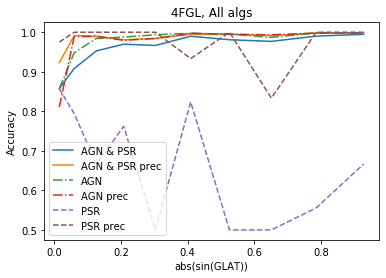

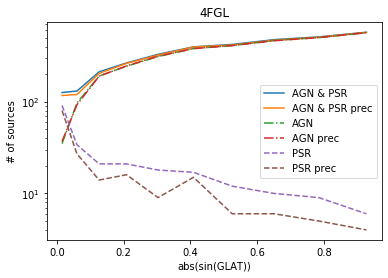

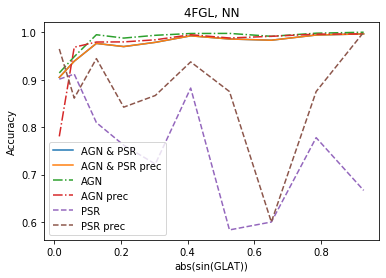

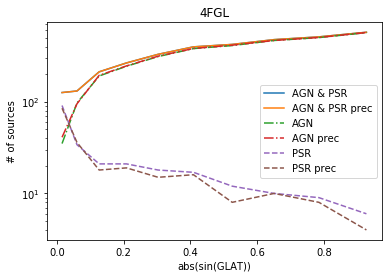

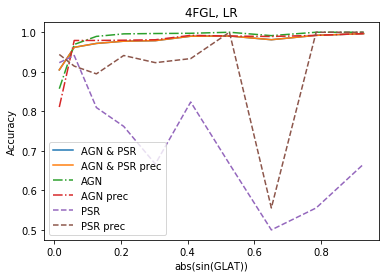

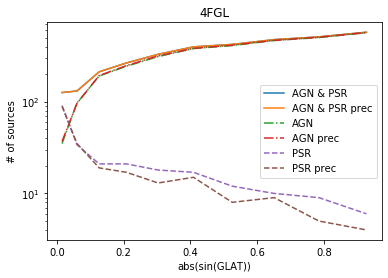

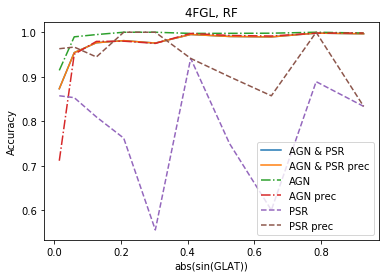

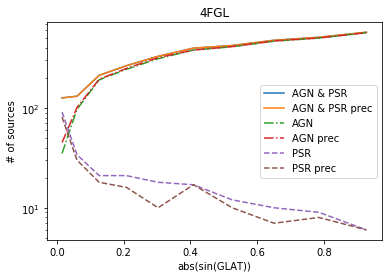

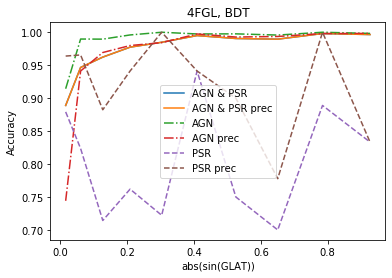

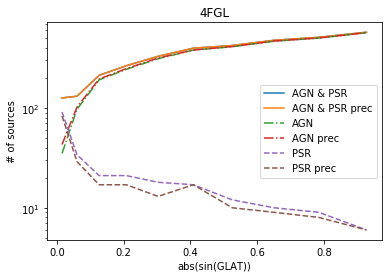

In [183]:
#alg = 'All algs'
algs0 = ['NN', 'LR', 'RF', 'BDT']
algs = ['All algs', 'NN', 'LR', 'RF', 'BDT']
save_plots = True
for alg in algs:
    masks_prec = {}
    if alg == 'All algs':
        masks_prec['AGN & PSR'] = (cat_df['Category_Prob'] == 'AGN') | (cat_df['Category_Prob'] == 'PSR')
        masks_prec['AGN'] = (cat_df['Category_Prob'] == 'AGN')
        masks_prec['PSR'] = (cat_df['Category_Prob'] == 'PSR')
    else:
        masks_prec['AGN & PSR'] = (cat_df['AGN_%s' % alg] > 0.5) | (cat_df['PSR_%s' % alg] > 0.5)
        masks_prec['AGN'] = (cat_df['AGN_%s' % alg] > 0.5)
        masks_prec['PSR'] = (cat_df['PSR_%s' % alg] > 0.5)
        
    for i in range(nbins):
        for key in masks.keys():
            bin_mask = (sin_glat > sin_bins[i]) & (sin_glat <= sin_bins[i + 1]) & masks[key]
            y_true = cat_df['Category_%s' % cat][bin_mask]
            if alg == 'All algs':
                y_pred = cat_df['Category_Prob'][bin_mask]
            else:
                y_pred = y_true.copy()
                y_pred[:] = 'PSR'
                agn_mask = cat_df['AGN_%s' % alg][bin_mask] > 0.5
                y_pred[agn_mask] = 'AGN'
            res[key][i] = accuracy_score(y_true, y_pred)
            nsrc[key][i] = np.sum(bin_mask)
            
            bin_mask = (sin_glat > sin_bins[i]) & (sin_glat <= sin_bins[i + 1]) & masks_prec[key] & masks['AGN & PSR']
            y_true = cat_df['Category_%s' % cat][bin_mask]
            if alg == 'All algs':
                y_pred = cat_df['Category_Prob'][bin_mask]
            else:
                y_pred = y_true.copy()
                y_pred[:] = 'PSR'
                agn_mask = cat_df['AGN_%s' % alg][bin_mask] > 0.5
                y_pred[agn_mask] = 'AGN'
            res_prec[key][i] = accuracy_score(y_true, y_pred)
            nsrc_prec[key][i] = np.sum(bin_mask)
            
    lss = ['-', '-.', '--']
    pyplot.figure()
    for i, key in enumerate(masks.keys()):
        pyplot.plot(sin_bins_c, res[key], ls=lss[i], label=key)
        pyplot.plot(sin_bins_c, res_prec[key], ls=lss[i], label=key + ' prec')
    pyplot.xlabel('abs(sin(GLAT))')
    pyplot.ylabel('Accuracy')
    pyplot.title('%s, %s' % (cat, alg))
    pyplot.legend()

    if save_plots:
        fn = '%s/%s_%s.pdf' % (plots_folder, alg, cat)
        print('save figure to file: %s' % fn)
        pyplot.savefig(fn)

    pyplot.figure()
    for i, key in enumerate(masks.keys()):
        pyplot.semilogy(sin_bins_c, nsrc[key], ls=lss[i], label=key)
        pyplot.semilogy(sin_bins_c, nsrc_prec[key], ls=lss[i], label=key + ' prec')
    pyplot.xlabel('abs(sin(GLAT))')
    pyplot.ylabel('# of sources')
    pyplot.title('%s' % (cat))
    pyplot.legend()

    if save_plots:
        fn = '%s/source_counts_%s_%s.pdf' % (plots_folder, alg, cat)
        print('save figure to file: %s' % fn)
        pyplot.savefig(fn)


In [184]:
# GLAT distribution
nbins = 20
sin_bins_unif = np.linspace(0, 1, nbins+1)
sin_bins_unif_c = (sin_bins_unif[1:] + sin_bins_unif[:-1]) / 2.
unas_mask = cat_df['Category_%s' % cat] == 'UNAS'

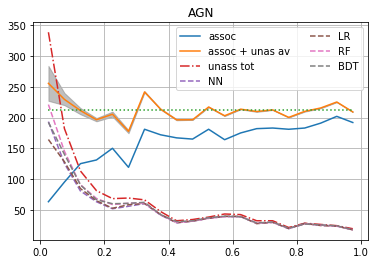

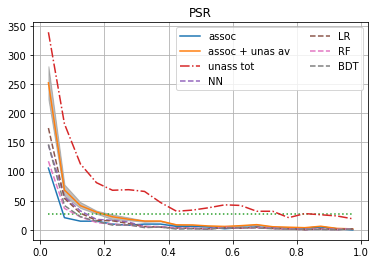

In [185]:
unass_lat_tot = np.histogram(sin_glat[unas_mask], bins=sin_bins_unif)[0]
for pop in ['AGN', 'PSR']:
    ass_lat = np.histogram(sin_glat[masks[pop]], bins=sin_bins_unif)[0]
    unass_lat = {}
    unass_lat_av = np.zeros(nbins)
    for alg in algs0:
        unass_lat[alg] = np.histogram(sin_glat[unas_mask], bins=sin_bins_unif, 
                                          weights=cat_df['%s_%s' % (pop, alg)][unas_mask])[0]
        unass_lat_av += unass_lat[alg] / len(algs0)
    
    minvs, maxvs = min_max_vs(unass_lat)
    xs = sin_bins_unif_c
    pyplot.figure()
    pyplot.plot(xs, ass_lat, label='assoc')
    pyplot.plot(xs, ass_lat + unass_lat_av, label='assoc + unas av')
    pyplot.plot(xs, np.mean(ass_lat + unass_lat_av) * np.ones(nbins), ls=':')
    pyplot.plot(xs, unass_lat_tot, ls='-.', label='unass tot')
    pyplot.fill_between(xs, ass_lat + minvs, ass_lat + maxvs, color='gray', alpha=0.5)
    for alg in algs0:
        pyplot.plot(xs, unass_lat[alg], ls='--', label=alg)
    pyplot.title(pop)
    pyplot.legend(ncol=2)
    pyplot.grid()
    pyplot.xlabel('abs(sin(GLAT))')
    pyplot.ylabel('# of sources')


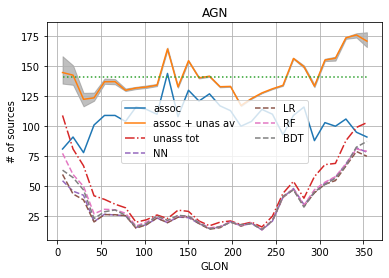

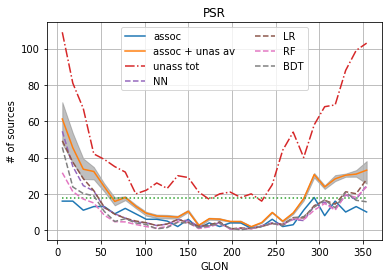

In [190]:
nbins = 30
glon_bins = np.linspace(0, 360, nbins+1)
glon_bins_c = (glon_bins[1:] + glon_bins[:-1]) / 2.
glon = cat_df['GLON']

unass_lon_tot = np.histogram(glon[unas_mask], bins=glon_bins)[0]
for pop in ['AGN', 'PSR']:
    ass_lon = np.histogram(glon[masks[pop]], bins=glon_bins)[0]
    unass_lon = {}
    unass_lon_av = np.zeros(nbins)
    for alg in algs0:
        unass_lon[alg] = np.histogram(glon[unas_mask], bins=glon_bins, 
                                          weights=cat_df['%s_%s' % (pop, alg)][unas_mask])[0]
        unass_lon_av += unass_lon[alg] / len(algs0)
    
    minvs, maxvs = min_max_vs(unass_lon)
    xs = glon_bins_c
    pyplot.figure()
    pyplot.plot(xs, ass_lon, label='assoc')
    pyplot.plot(xs, ass_lon + unass_lon_av, label='assoc + unas av')
    pyplot.plot(xs, np.mean(ass_lon + unass_lon_av) * np.ones(nbins), ls=':')
    pyplot.plot(xs, unass_lon_tot, ls='-.', label='unass tot')
    pyplot.fill_between(xs, ass_lon + minvs, ass_lon + maxvs, color='gray', alpha=0.5)
    for alg in algs0:
        pyplot.plot(xs, unass_lon[alg], ls='--', label=alg)
    pyplot.title(pop)
    pyplot.legend(ncol=2)
    pyplot.grid()
    pyplot.xlabel('GLON')
    pyplot.ylabel('# of sources')
